## Does Sinning Payoff?

### An analysis on the VICE ETF vs ESG ETFs

This analysis looks at the performance of the VICE ETF, two ESG ETFs, and the Fidelity 500 Index Fund (FXIAX). Performance is assessed in terms of the Fama-French Three Factor Model. This is checked against the Five-Factor Model and Capital Asset Pricing Model (CAPM).

ESG funds invest ethically and responsibly, and specifically consider environmental, social, and governance factors.

The AdvisorShares VICE ETF invests in industries considered unethical, including (but not limited to) the following industries:
* Tobacco
* Alcohol
* Gambling
* Adult Entertainment
* Weapons

The following two ESG ETFs are included in the analysis:
* Vanguard ESG U.S. Stock ETF (ESGV)
* 1919 Socially Responsive Balanced Fund (SSIAX)

The FXIAX fund attempts to mirror the S&P 500, and does not have ESG fund attributes - nor is its focus to replicate sin stocks. This is included as a base to compare the VICE and ESG ETFs against.

The three-year period from 1 November 2018 to 1 November 2021 is included as the observed period.

### ETF Data Collection and Processing
This section deals with the collection and processing of data with respect to the aforementioned funds.
Data is collected from Yahoo Finance via the yfinance api library, manipulated, and cleaned.

In [438]:
# Importing relevant libraries to use during processing and analysis
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import warnings
from scipy import stats
warnings.simplefilter(action='ignore',category=FutureWarning)

In [439]:
# Retrieving the price histories for the aforementioned ETFs and funds.
tickers = yf.Tickers(['VICE', 'ESGV', 'SSIAX', 'FXAIX'])
phist = tickers.history(interval="1d", start="2017-10-31", end="2021-10-31")
phist


[*********************100%***********************]  4 of 4 completed


Close                                   Dividends              \
                 ESGV       FXAIX      SSIAX       VICE      ESGV FXAIX SSIAX   
Date                                                                            
2017-10-30        NaN   83.041100  16.204685        NaN       NaN   0.0   0.0   
2017-10-31        NaN   83.124107  16.213448        NaN       NaN   0.0   0.0   
2017-11-01        NaN   83.253235  16.239740        NaN       NaN   0.0   0.0   
2017-11-02        NaN   83.280907  16.274797        NaN       NaN   0.0   0.0   
2017-11-03        NaN   83.548347  16.327381        NaN       NaN   0.0   0.0   
...               ...         ...        ...        ...       ...   ...   ...   
2021-10-25  84.949997  158.529999  28.209999  33.654999       0.0   0.0   0.0   
2021-10-26  85.000000  158.809998  28.260000  33.584000       0.0   0.0   0.0   
2021-10-27  84.559998  158.009995  28.270000  33.158001       0.0   0.0   0.0   
2021-10-28  85.540001  159.580002  28.440001  33.140999       0.0   0.0   0.0   
2021-10-29  85.730003  159.899994  28.549999  32.904999       0.0   0.0   0.0   

                      High              ...       Open             \
           VICE       ESGV       FXAIX  ...      SSIAX       VICE   
Date                                    ...                         
2017-10-30  NaN        NaN   83.041100  ...  16.204685        NaN   
2017-10-31  NaN        NaN   83.124107  ...  16.213448        NaN   
2017-11-01  NaN        NaN   83.253235  ...  16.239740        NaN   
2017-11-02  NaN        NaN   83.280907  ...  16.274797        NaN   
2017-11-03  NaN        NaN   83.548347  ...  16.327381        NaN   
...         ...        ...         ...  ...        ...        ...   
2021-10-25  0.0  85.050003  158.529999  ...  28.209999  33.660000   
2021-10-26  0.0  85.540001  158.809998  ...  28.260000  33.880001   
2021-10-27  0.0  85.279999  158.009995  ...  28.270000  33.730000   
2021-10-28  0.0  85.550003  159.580002  ...  28.440001  33.088001   
2021-10-29  0.0  85.809998  159.899994  ...  28.549999  33.000000   

           Stock Splits                     Volume                      
                   ESGV FXAIX SSIAX VICE      ESGV FXAIX SSIAX    VICE  
Date                                                                    
2017-10-30          NaN     0     0  NaN       NaN     0     0     NaN  
2017-10-31          NaN     0     0  NaN       NaN     0     0     NaN  
2017-11-01          NaN     0     0  NaN       NaN     0     0     NaN  
2017-11-02          NaN     0     0  NaN       NaN     0     0     NaN  
2017-11-03          NaN     0     0  NaN       NaN     0     0     NaN  
...                 ...   ...   ...  ...       ...   ...   ...     ...  
2021-10-25          0.0     0     0  0.0  205500.0     0     0   800.0  
2021-10-26          0.0     0     0  0.0  198500.0     0     0  1100.0  
2021-10-27          0.0     0     0  0.0  117800.0     0     0   400.0  
2021-10-28          0.0     0     0  0.0  316600.0     0     0   800.0  
2021-10-29          0.0     0     0  0.0  169600.0     0     0   900.0  

[1008 rows x 28 columns]

In [440]:
# Dropping unneeded columns and removing NaN data
phist.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
phist.dropna(inplace=True)

In [441]:
phist.index = pd.to_datetime(phist.index)
phist

Close                                  
                 ESGV       FXAIX      SSIAX       VICE
Date                                                   
2018-09-20  48.654598   96.279358  18.269062  25.873234
2018-09-21  48.567879   96.251282  18.241184  25.627678
2018-09-24  48.413692   95.914207  18.194721  25.588806
2018-09-25  48.423328   95.792480  18.185429  25.553728
2018-09-26  48.201687   95.474144  18.138969  25.598286
...               ...         ...        ...        ...
2021-10-25  84.949997  158.529999  28.209999  33.654999
2021-10-26  85.000000  158.809998  28.260000  33.584000
2021-10-27  84.559998  158.009995  28.270000  33.158001
2021-10-28  85.540001  159.580002  28.440001  33.140999
2021-10-29  85.730003  159.899994  28.549999  32.904999

[784 rows x 4 columns]

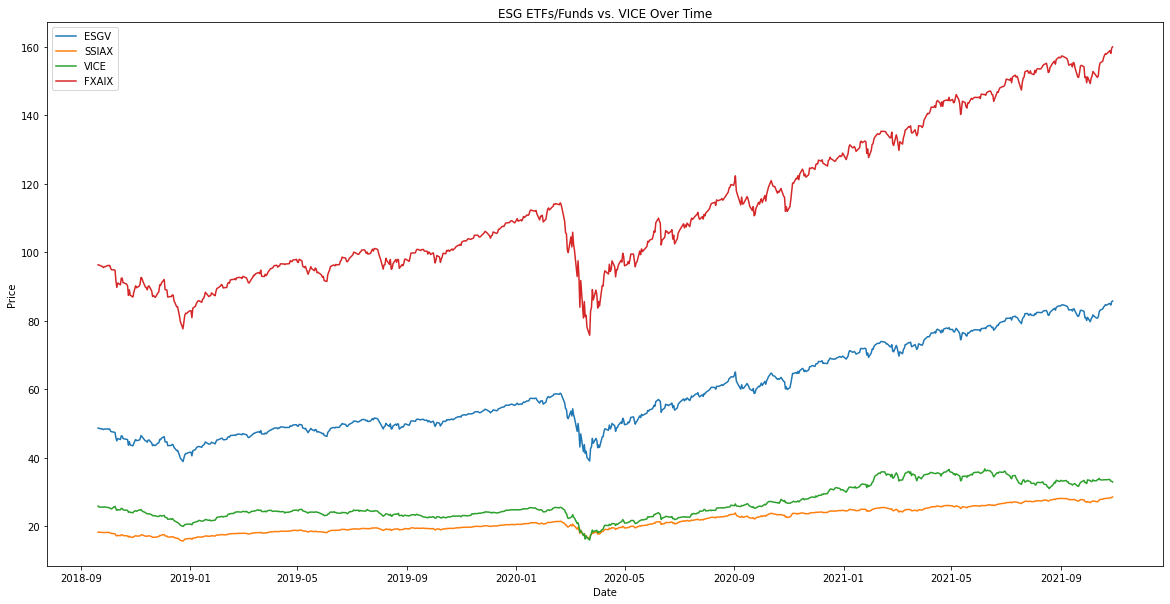

In [442]:
# Visualizing Price History for the four ETFs
plt.figure(figsize=(20,10))
plt.plot(phist["Close","ESGV"], label="ESGV")
plt.plot(phist["Close","SSIAX"], label="SSIAX")
plt.plot(phist["Close","VICE"], label="VICE")
plt.plot(phist["Close","FXAIX"], label="FXAIX")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ESG ETFs/Funds vs. VICE Over Time")
plt.legend(loc="upper left")

In [443]:
# Computing the daily returns (rate of change of daily close prices)
ret = phist.pct_change(axis=0)
ret.dropna(inplace=True)
ret = ret.droplevel(0, axis=1)
ret

,ESGV,FXAIX,SSIAX,VICE
Date,,,,
2018-09-21,-0.001782,-0.000292,-0.001526,-0.009491
2018-09-24,-0.003175,-0.003502,-0.002547,-0.001517
2018-09-25,0.000199,-0.001269,-0.000511,-0.001371
2018-09-26,-0.004577,-0.003323,-0.002555,0.001744
2018-09-27,0.002999,0.002942,0.001537,0.002963
...,...,...,...,...
2021-10-25,0.005206,0.004753,0.003201,0.003010
2021-10-26,0.000589,0.001766,0.001772,-0.002110
2021-10-27,-0.005176,-0.005037,0.000354,-0.012685


In [444]:
# Including all data from 31 OCTOBER 2018 Only
start = '2018-10-31'
mask = (ret.index > start)
ret1 = ret.loc[mask]
ret1

,ESGV,FXAIX,SSIAX,VICE
Date,,,,
2018-11-01,0.012271,0.010542,0.010348,0.005243
2018-11-02,-0.007231,-0.006155,-0.007008,-0.007032
2018-11-05,0.003214,0.005563,0.000000,0.016148
2018-11-06,0.006620,0.006367,0.004886,-0.003638
2018-11-07,0.022274,0.021263,0.016207,0.008647
...,...,...,...,...
2021-10-25,0.005206,0.004753,0.003201,0.003010
2021-10-26,0.000589,0.001766,0.001772,-0.002110
2021-10-27,-0.005176,-0.005037,0.000354,-0.012685


### Processing Fama-French Factors
Fama-French factors are retrieved from Kenneth French's data library (https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).

These factors include the market risk premium ($MRP$), value premium ($HML$), size premium ($SMB$), profitability factor ($RMW$), and investment factor ($CMA$).

In [445]:
#Load in the factors from the CSV file 
ff = pd.read_csv('factors.csv',skiprows=3)
ff

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.01,-0.35,0.03,0.11,0.012
1,19630702,0.79,-0.31,0.24,-0.08,-0.25,0.012
2,19630703,0.63,-0.16,-0.09,0.13,-0.24,0.012
3,19630705,0.40,0.09,-0.26,0.07,-0.28,0.012
4,19630708,-0.63,0.07,-0.19,-0.27,0.06,0.012
...,...,...,...,...,...,...,...
14680,20211025,0.58,0.37,-0.16,-0.39,-0.35,0.000
14681,20211026,0.04,-0.81,-0.32,-0.38,-0.12,0.000
14682,20211027,-0.76,-0.95,-1.19,0.86,-0.60,0.000
14683,20211028,1.14,0.81,-0.47,-0.30,-0.18,0.000


In [446]:
# Renaming and reformatting the date column
ff.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
ff['Date'] = pd.to_datetime(ff['Date'], format='%Y%m%d')
ff

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1963-07-01,-0.67,0.01,-0.35,0.03,0.11,0.012
1,1963-07-02,0.79,-0.31,0.24,-0.08,-0.25,0.012
2,1963-07-03,0.63,-0.16,-0.09,0.13,-0.24,0.012
3,1963-07-05,0.40,0.09,-0.26,0.07,-0.28,0.012
4,1963-07-08,-0.63,0.07,-0.19,-0.27,0.06,0.012
...,...,...,...,...,...,...,...
14680,2021-10-25,0.58,0.37,-0.16,-0.39,-0.35,0.000
14681,2021-10-26,0.04,-0.81,-0.32,-0.38,-0.12,0.000
14682,2021-10-27,-0.76,-0.95,-1.19,0.86,-0.60,0.000
14683,2021-10-28,1.14,0.81,-0.47,-0.30,-0.18,0.000


In [447]:
# Setting Date as the index
ff.set_index('Date', inplace=True)
ff
ff

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.67,0.01,-0.35,0.03,0.11,0.012
1963-07-02,0.79,-0.31,0.24,-0.08,-0.25,0.012
1963-07-03,0.63,-0.16,-0.09,0.13,-0.24,0.012
1963-07-05,0.40,0.09,-0.26,0.07,-0.28,0.012
1963-07-08,-0.63,0.07,-0.19,-0.27,0.06,0.012
...,...,...,...,...,...,...
2021-10-25,0.58,0.37,-0.16,-0.39,-0.35,0.000
2021-10-26,0.04,-0.81,-0.32,-0.38,-0.12,0.000
2021-10-27,-0.76,-0.95,-1.19,0.86,-0.60,0.000


In [448]:
# Include dates from 31 OCTOBER 2018 onward, to match the ETF returns dataset
start = '2018-10-31'
mask = (ff.index > start)
ff = ff.loc[mask]
ff

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2018-11-01,1.29,1.23,-1.14,-0.24,-0.47,0.008
2018-11-02,-0.53,0.84,0.67,-0.46,0.23,0.008
2018-11-05,0.40,-0.88,1.56,-0.50,0.76,0.008
2018-11-06,0.58,-0.14,0.02,0.30,0.21,0.008
2018-11-07,2.11,-0.53,-1.06,-0.39,-0.82,0.008
...,...,...,...,...,...,...
2021-10-25,0.58,0.37,-0.16,-0.39,-0.35,0.000
2021-10-26,0.04,-0.81,-0.32,-0.38,-0.12,0.000
2021-10-27,-0.76,-0.95,-1.19,0.86,-0.60,0.000


In [449]:
# Scale factors - divide by 100 to match scale of ETFs
ff = ff/100

In [450]:
# Merge the ETF returns data and the Fama French factors
ret_ff = pd.merge(ret1,ff,how='inner',left_index=True, right_index=True)
ret_ff

,ESGV,FXAIX,SSIAX,VICE,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,
2018-11-01,0.012271,0.010542,0.010348,0.005243,0.0129,0.0123,-0.0114,-0.0024,-0.0047,0.00008
2018-11-02,-0.007231,-0.006155,-0.007008,-0.007032,-0.0053,0.0084,0.0067,-0.0046,0.0023,0.00008
2018-11-05,0.003214,0.005563,0.000000,0.016148,0.0040,-0.0088,0.0156,-0.0050,0.0076,0.00008
2018-11-06,0.006620,0.006367,0.004886,-0.003638,0.0058,-0.0014,0.0002,0.0030,0.0021,0.00008
2018-11-07,0.022274,0.021263,0.016207,0.008647,0.0211,-0.0053,-0.0106,-0.0039,-0.0082,0.00008
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,0.005206,0.004753,0.003201,0.003010,0.0058,0.0037,-0.0016,-0.0039,-0.0035,0.00000
2021-10-26,0.000589,0.001766,0.001772,-0.002110,0.0004,-0.0081,-0.0032,-0.0038,-0.0012,0.00000
2021-10-27,-0.005176,-0.005037,0.000354,-0.012685,-0.0076,-0.0095,-0.0119,0.0086,-0.0060,0.00000


In [451]:
# Calculate the Excess Return of Each ETF (in excess of RF)
ret_ff['ESGV_DIFF'] = ret_ff['ESGV']-ret_ff['RF']
ret_ff['FXAIX_DIFF'] = ret_ff['FXAIX']-ret_ff['RF']
ret_ff['SSIAX_DIFF'] = ret_ff['SSIAX']-ret_ff['RF']
ret_ff['VICE_DIFF'] = ret_ff['VICE']-ret_ff['RF']
ret_ff

,ESGV,FXAIX,SSIAX,VICE,Mkt-RF,SMB,HML,RMW,CMA,RF,ESGV_DIFF,FXAIX_DIFF,SSIAX_DIFF,VICE_DIFF
Date,,,,,,,,,,,,,,
2018-11-01,0.012271,0.010542,0.010348,0.005243,0.0129,0.0123,-0.0114,-0.0024,-0.0047,0.00008,0.012191,0.010462,0.010268,0.005163
2018-11-02,-0.007231,-0.006155,-0.007008,-0.007032,-0.0053,0.0084,0.0067,-0.0046,0.0023,0.00008,-0.007311,-0.006235,-0.007088,-0.007112
2018-11-05,0.003214,0.005563,0.000000,0.016148,0.0040,-0.0088,0.0156,-0.0050,0.0076,0.00008,0.003134,0.005483,-0.000080,0.016068
2018-11-06,0.006620,0.006367,0.004886,-0.003638,0.0058,-0.0014,0.0002,0.0030,0.0021,0.00008,0.006540,0.006287,0.004806,-0.003718
2018-11-07,0.022274,0.021263,0.016207,0.008647,0.0211,-0.0053,-0.0106,-0.0039,-0.0082,0.00008,0.022194,0.021183,0.016127,0.008567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,0.005206,0.004753,0.003201,0.003010,0.0058,0.0037,-0.0016,-0.0039,-0.0035,0.00000,0.005206,0.004753,0.003201,0.003010
2021-10-26,0.000589,0.001766,0.001772,-0.002110,0.0004,-0.0081,-0.0032,-0.0038,-0.0012,0.00000,0.000589,0.001766,0.001772,-0.002110
2021-10-27,-0.005176,-0.005037,0.000354,-0.012685,-0.0076,-0.0095,-0.0119,0.0086,-0.0060,0.00000,-0.005176,-0.005037,0.000354,-0.012685


---

## Fama French Three Factor Models

This section contains regression analyses to assess the performance of each selected ETF/fund.

The performance of each ETF/fund is modelled on the Fama French Three Factor model, where a dependent variable (the ETF or fund's returns) are regressed on three factors included as independent variables. These independent variables are:
* Market Risk Premium ($MRP$)
    - $MRP = R_{market}-RF$
* Size Premium (SMB)
* value Premium (HML)

The general model for the analyses in this section is as follows:
$$
\hat{R}_{ETF}=\hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

where $\hat{R}_{ETF}$ is the expected excess return on the respective ETF/fund being assessed.

This model allows us to see the respective fund/ETF's performance relative to the market, size premium, and value premium factors. If a firm generates a return in excess of these factors, it's alpha (or regression constant) will be statistically different from zero.

### VICE Performance Model

The following is a regression of the VICE ETF excess returns (in excess of the risk-free rate) on three Fama French Factors (MRP, HML, SMB).

$$
\hat{R}_{VICE} = \hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

In [452]:
# VICE Regression
x = ret_ff[['Mkt-RF','SMB', 'HML']]
y = ret_ff['VICE_DIFF']
x = sm.add_constant(x)
OLS_VICE_FF3 = sm.OLS(y,x).fit()
OLS_VICE_FF3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              VICE_DIFF   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     716.1
Date:                Tue, 28 Dec 2021   Prob (F-statistic):          1.31e-219
Time:                        23:54:45   Log-Likelihood:                 2652.1
No. Observations:                 754   AIC:                            -5296.
Df Residuals:                     750   BIC:                            -5278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.728      0.467      -0.001       0.000
Mkt-RF         0.7432      0.018     40.572      0.000       0.707       0.779
SMB            0.4643      0.036     12.928      0.000       0.394       0.535
HML           -0.0388      0.025     -1.532      0.126      -0.089       0.011
==============================================================================
Omnibus:                       37.914   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.265
Skew:                           0.079   Prob(JB):                     1.26e-26
Kurtosis:                       4.942   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**VICE ETF Analysis Comments**:
* Alpha (const) is statistically insignificant (p=0.467)
* Positive market beta (0.7432) - statistically significant
    - Moves in the same direction as the market (moderately strong)
* Positive size premium coefficient - statistically significant
    - Positive movement with small cap stocks (moderately positive)
* Positive value premium coefficient  - statistically significant
    - Positive movement with value stocks (weakly positive)
* Acceptable DW - very low negative autocorrelation (DW=2.053, which is very close to 2)
* Normally distributed (JB p-value < 0.00)

### ESGV Performance Model
The following is a regression of the ESGV ETF excess returns (in excess of the risk-free rate) on three Fama French Factors (MRP, HML, SMB). 
$$
\hat{R}_{ESGV} = \hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

In [453]:
x = ret_ff[['Mkt-RF','SMB', 'HML']]
y = ret_ff['ESGV_DIFF']
x = sm.add_constant(x)
OLS_ESGV_FF3 = sm.OLS(y,x).fit()
OLS_ESGV_FF3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ESGV_DIFF   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.180e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 4057.6
No. Observations:                 754   AIC:                            -8107.
Df Residuals:                     750   BIC:                            -8089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.277e-05   4.08e-05      1.540      0.124   -1.72e-05       0.000
Mkt-RF         0.9912      0.003    348.973      0.000       0.986       0.997
SMB           -0.0365      0.006     -6.554      0.000      -0.047      -0.026
HML           -0.0343      0.004     -8.727      0.000      -0.042      -0.027
==============================================================================
Omnibus:                      184.744   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4423.397
Skew:                          -0.487   Prob(JB):                         0.00
Kurtosis:                      14.826   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**ESGV ETF Analysis Comments**:
* Alpha (const) is statistically insignificant (p=0.124)
* Positive market beta (0.99) - statistically significant
    - Strong, positive movement with the market (nearly 1-for-1)
* Negative size premium coefficient - statistically significant
    - Positive movement with large cap stocks (negative movement with small caps)
* Positive value premium coefficient  - statistically significant
    - Positive movement with growth stocks (negative movement with value stocks)
* Acceptable DW - low levels of negative autocorrelation (DW=2.387, which is close to 2)
* Normally distributed (JB p-value = 0.00)

### SSIAX Performance Model
The following is a regression of the SSIAX ETF excess returns (in excess of the risk-free rate) on three Fama French Factors (MRP, HML, SMB). 
$$
\hat{R}_{SSIAX} = \hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

In [454]:
x = ret_ff[['Mkt-RF','SMB', 'HML']]
y = ret_ff['SSIAX_DIFF']
x = sm.add_constant(x)
OLS_SSIAX_FF3 = sm.OLS(y,x).fit()
OLS_SSIAX_FF3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SSIAX_DIFF   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 3893.6
No. Observations:                 754   AIC:                            -7779.
Df Residuals:                     750   BIC:                            -7761.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.754e-05   5.07e-05      1.926      0.055    -1.9e-06       0.000
Mkt-RF         0.6584      0.004    186.486      0.000       0.651       0.665
SMB           -0.0589      0.007     -8.516      0.000      -0.073      -0.045
HML           -0.0734      0.005    -15.031      0.000      -0.083      -0.064
==============================================================================
Omnibus:                      186.467   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.215
Skew:                          -0.856   Prob(JB):                         0.00
Kurtosis:                       9.926   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**SSIAX ETF Analysis Comments**:
* Weak, positive alpha (statistically significant at 10% level, insig at lower levels)
* Positive market beta (0.66) - statistically significant
    - Moves in the same direction as the market (moderately strong)
* Negative size premium coefficient - statistically significant
    - Positive movement with large cap stocks (negative movement with small caps)
* Negative value premium coefficient - statistically significant
    - Negative movement with value stocks (positive movement with growth stocks)
* Acceptable DW - low levels of positive autocorrelation (DW=1.889, which is close to 2)
* Normally distributed (JB p-value = 0.00)

### FXAIX Performance Model
The following is a regression of the FXAIX ETF excess returns (in excess of the risk-free rate) on three Fama French Factors (MRP, HML, SMB). 
$$
\hat{R}_{FXAIX} = \hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

In [455]:
x = ret_ff[['Mkt-RF','SMB', 'HML']]
y = ret_ff['FXAIX_DIFF']
x = sm.add_constant(x)
OLS_FXAIX_FF3 = sm.OLS(y,x).fit()
OLS_FXAIX_FF3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FXAIX_DIFF   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.378e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 4319.1
No. Observations:                 754   AIC:                            -8630.
Df Residuals:                     750   BIC:                            -8612.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.175e-06   2.88e-05      0.180      0.858   -5.14e-05    6.17e-05
Mkt-RF         0.9913      0.002    493.718      0.000       0.987       0.995
SMB           -0.1409      0.004    -35.801      0.000      -0.149      -0.133
HML            0.0628      0.003     22.598      0.000       0.057       0.068
==============================================================================
Omnibus:                       26.966   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.318
Skew:                           0.176   Prob(JB):                     3.58e-13
Kurtosis:                       4.304   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**FXAIX ETF Analysis Comments**:
* Statistically insignificant alpha (p=0.858)
* Positive market beta (0.99) - statistically significant
    - Strong movement with market (nearly 1-for-1)
    - Expected as this is supposed to replicate the S&P 500
* Negative size premium coefficient - statistically significant
    - Positive movement with large cap stocks (negative movement with small caps)
* Positive value premium coefficient - statistically significant
    - Positive movement with value stocks (negative movement with growth stocks)
* Acceptable DW - very low levels of autocorrelation (DW=2.045)
* Normally distributed (JB p-value < 0.00)

In [456]:
ret_ff.to_csv('returns_factors.csv')

---

## Five-Factor Models

The performance of each ETF/fund is also modelled on the Fama French Five-Factor model, where a dependent variable (the ETF or fund's returns) are regressed on five factors included as independent variables. These independent variables are:
* Market Risk Premium ($MRP$)
    - $MRP = R_{market}-RF$
* Size Premium (SMB)
* Value Premium (HML)
* Profitability Factor (RMW)
* Investment Factor (CMA)

The Five-Factor Models are specified as follows:

$$
\hat{R}_{ETF} = \hat{\alpha}_0 + \hat{\beta}_0(MRP) + \hat{\beta}_1(SMB) + \hat{\beta}_2(HML) + \hat{\beta}_3(RMW) + \hat{\beta}_4(CMA)
$$

Other than $RMW$ and $CMA$, all other variables and parameters are consistent with the previous Three-Factor Model section, and follow the same logic.

#### VICE ETF

In [457]:
# Setting the regressand and regressors
y = ret_ff['VICE_DIFF']
x = ret_ff[['Mkt-RF','SMB','HML','RMW','CMA']]
x = sm.add_constant(x)

# OLS regression
OLS_VICE_FF5 = sm.OLS(y,x).fit()
OLS_VICE_FF5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              VICE_DIFF   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     450.7
Date:                Tue, 28 Dec 2021   Prob (F-statistic):          7.45e-223
Time:                        23:54:45   Log-Likelihood:                 2666.3
No. Observations:                 754   AIC:                            -5321.
Df Residuals:                     748   BIC:                            -5293.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.510      0.610      -0.001       0.000
Mkt-RF         0.7543      0.019     40.093      0.000       0.717       0.791
SMB            0.3869      0.039     10.038      0.000       0.311       0.463
HML            0.0220      0.033      0.660      0.510      -0.043       0.087
RMW           -0.3080      0.058     -5.300      0.000      -0.422      -0.194
CMA            0.1199      0.074      1.620      0.106      -0.025       0.265
==============================================================================
Omnibus:                       35.806   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.114
Skew:                           0.112   Prob(JB):                     2.47e-23
Kurtosis:                       4.807   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**VICE ETF Analysis Comments**:
* Statistically insignificant alpha (p=0.610)
* Positive market beta (0.7543) - statistically significant
* Positive size premium coefficient - statistically significant
    - Positive movement with small caps
* Insignificant value premium coefficient
* Negative profitability factor coefficient - statistically significant
* Insignificant investment factor coefficient
* Acceptable DW (DW=2.119)
* Normally distributed (JB p-value < 0.00)

#### ESGV ETF

In [458]:
# Setting the regressand and regressors
y = ret_ff['ESGV_DIFF']
x = ret_ff[['Mkt-RF','SMB','HML','RMW','CMA']]
x = sm.add_constant(x)

# OLS regression
OLS_ESGV_FF5 = sm.OLS(y,x).fit()
OLS_ESGV_FF5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ESGV_DIFF   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.673e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 4082.4
No. Observations:                 754   AIC:                            -8153.
Df Residuals:                     748   BIC:                            -8125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.233e-05   3.95e-05      1.324      0.186   -2.53e-05       0.000
Mkt-RF         0.9875      0.003    343.335      0.000       0.982       0.993
SMB           -0.0230      0.006     -3.896      0.000      -0.035      -0.011
HML           -0.0406      0.005     -7.979      0.000      -0.051      -0.031
RMW            0.0579      0.009      6.519      0.000       0.040       0.075
CMA           -0.0445      0.011     -3.933      0.000      -0.067      -0.022
==============================================================================
Omnibus:                      184.044   Durbin-Watson:                   2.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4947.927
Skew:                          -0.431   Prob(JB):                         0.00
Kurtosis:                      15.520   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**ESGV ETF Analysis Comments**:
* Statistically insignificant alpha (p=0.186)
* Positive market beta (0.9875) - statistically significant
    - Strong movement with market (nearly 1-for-1)
* Negative size premium coefficient - statistically significant
    - Negative movement with small caps
* Negative value premium coefficient - statistically significant
* Positive profitability factor coefficient - statistically significant
* Negative investment factor coefficient - statistically significant
* Acceptable DW (DW=2.424)
* Normally distributed (JB p-value = 0.00)

#### SSIAX Fund

In [459]:
# Setting the regressand and regressors
y = ret_ff['SSIAX_DIFF']
x = ret_ff[['Mkt-RF','SMB','HML','RMW','CMA']]
x = sm.add_constant(x)

# OLS regression
OLS_SSIAX_FF5 = sm.OLS(y,x).fit()
OLS_SSIAX_FF5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SSIAX_DIFF   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     7543.
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 3919.9
No. Observations:                 754   AIC:                            -7828.
Df Residuals:                     748   BIC:                            -7800.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.799e-05    4.9e-05      1.794      0.073   -8.27e-06       0.000
Mkt-RF         0.6520      0.004    182.729      0.000       0.645       0.659
SMB           -0.0466      0.007     -6.379      0.000      -0.061      -0.032
HML           -0.0716      0.006    -11.352      0.000      -0.084      -0.059
RMW            0.0597      0.011      5.418      0.000       0.038       0.081
CMA           -0.0812      0.014     -5.785      0.000      -0.109      -0.054
==============================================================================
Omnibus:                      171.621   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.078
Skew:                          -0.741   Prob(JB):                         0.00
Kurtosis:                       9.940   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**SSIAX ETF Analysis Comments**:
* Statistically significant alpha at 10% level (p=0.073)
* Positive market beta (0.6520) - statistically significant
* Negative size premium coefficient - statistically significant
    - Negative movement with small caps
    - Less susceptible to economic downturns
* Negative value premium coefficient - statistically significant
    - Negative movement with value stocks
    - Less susceptible to financial downturns
* Positive profitability factor coefficient - statistically significant
    - Positive movement with high profitability firms
* Negative investment factor coefficient - statistically significant
    - Inverse movement with high-investment firms
* Acceptable DW (DW=1.878)
* Normally distributed (JB p-value = 0.00)

#### FXAIX Fund

In [460]:
# Setting the regressand and regressors
y = ret_ff['FXAIX_DIFF']
x = ret_ff[['Mkt-RF','SMB','HML','RMW','CMA']]
x = sm.add_constant(x)

# OLS regression
OLS_FXAIX_FF5 = sm.OLS(y,x).fit()
OLS_FXAIX_FF5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FXAIX_DIFF   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.762e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 4431.7
No. Observations:                 754   AIC:                            -8851.
Df Residuals:                     748   BIC:                            -8824.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.228e-05   2.49e-05     -0.494      0.622   -6.11e-05    3.65e-05
Mkt-RF         0.9937      0.002    549.037      0.000       0.990       0.997
SMB           -0.1181      0.004    -31.854      0.000      -0.125      -0.111
HML            0.0306      0.003      9.567      0.000       0.024       0.037
RMW            0.0775      0.006     13.864      0.000       0.067       0.088
CMA            0.0419      0.007      5.878      0.000       0.028       0.056
==============================================================================
Omnibus:                       49.777   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.843
Skew:                           0.263   Prob(JB):                     1.07e-33
Kurtosis:                       5.135   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**FXAIX ETF Analysis Comments**:
* Insignificant alpha (p=0.622)
* Positive market beta (0.9937) - statistically significant
    - Almost 1-for-1 movement with the market (to be expected as fund is supposed to mirror SP500)
* Negative size premium coefficient - statistically significant
    - Negative movement with small caps
    - Less susceptible to economic downturns
* Positive value premium coefficient - statistically significant
    - Positive movement with value stocks
    - Higher financial downturn risk
* Positive profitability factor coefficient - statistically significant
    - Positive movement with high profitability firms
* Positive investment factor coefficient - statistically significant
    - Positive movement with high-investment firms
* Acceptable DW (DW=2.050 which is close to 2)
* Normally distributed (JB p-value < 0.00)

___

## Capital Asset Pricing Models


I also assess the performance of each ETF/fund with the CAPM model, as a means to compare the Three- and Five-Factor models against. The excess return of each fund/ETF is regressed on the $MRP$.

* Market Risk Premium ($MRP$)
    - $MRP = R_{market}-RF$

The CAPMs are specified as follows:

$$
\hat{R}_{ETF} = \hat{\alpha}_0 + \hat{\beta}_0(MRP)
$$

All variables and parameters are consistent with the previous two sections, and follow the same logic.

#### VICE ETF

In [461]:
# Setting the regressand and the regressor
y = ret_ff['VICE_DIFF']
x = ret_ff['Mkt-RF']
x = sm.add_constant(x)

# OLS
OLS_VICE_CAPM = sm.OLS(y,x).fit()
OLS_VICE_CAPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              VICE_DIFF   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1560.
Date:                Tue, 28 Dec 2021   Prob (F-statistic):          1.47e-185
Time:                        23:54:45   Log-Likelihood:                 2565.8
No. Observations:                 754   AIC:                            -5128.
Df Residuals:                     752   BIC:                            -5118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.765      0.444      -0.001       0.000
Mkt-RF         0.7925      0.020     39.493      0.000       0.753       0.832
==============================================================================
Omnibus:                       68.794   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.835
Skew:                          -0.059   Prob(JB):                     1.50e-87
Kurtosis:                       6.566   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**VICE ETF Analysis Comments**:
* Insignificant alpha (p=0.444)
* Positive market beta (0.7925) - statistically significant
* Acceptable DW (DW=2.017 which is close to 2)
* Normally distributed (JB p-value < 0.00)

#### ESGV ETF

In [462]:
# Setting the regressand and the regressor
y = ret_ff['ESGV_DIFF']
x = ret_ff['Mkt-RF']
x = sm.add_constant(x)

# OLS
OLS_ESGV_CAPM = sm.OLS(y,x).fit()
OLS_ESGV_CAPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ESGV_DIFF   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.703e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 3960.6
No. Observations:                 754   AIC:                            -7917.
Df Residuals:                     752   BIC:                            -7908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.118e-05   4.63e-05      1.755      0.080   -9.62e-06       0.000
Mkt-RF         0.9831      0.003    311.499      0.000       0.977       0.989
==============================================================================
Omnibus:                       92.812   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.864
Skew:                          -0.327   Prob(JB):                    6.04e-128
Kurtosis:                       7.269   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**ESGV ETF Analysis Comments**:
* Positive and statistically significant alpha at the 10% level (p=0.08)
* Positive market beta (0.9831) - statistically significant
* Acceptable DW (DW=2.195)
* Normally distributed (JB p-value < 0.00)

#### SSIAX Fund

In [463]:
# Setting the regressand and the regressor
y = ret_ff['SSIAX_DIFF']
x = ret_ff['Mkt-RF']
x = sm.add_constant(x)

# OLS
OLS_SSIAX_CAPM = sm.OLS(y,x).fit()
OLS_SSIAX_CAPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SSIAX_DIFF   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 3691.1
No. Observations:                 754   AIC:                            -7378.
Df Residuals:                     752   BIC:                            -7369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   6.61e-05      2.040      0.042    5.09e-06       0.000
Mkt-RF         0.6432      0.005    142.569      0.000       0.634       0.652
==============================================================================
Omnibus:                       55.002   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.027
Skew:                          -0.468   Prob(JB):                     5.75e-24
Kurtosis:                       4.590   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**SSIAX ETF Analysis Comments**:
* Positive and statistically significant alpha at the 5% and 10% levels (p=0.042)
* Positive market beta (0.6432) - statistically significant
* Acceptable DW (DW=1.853 which is close to 2)
* Normally distributed (JB p-value < 0.00)

#### FXAIX Fund

In [464]:
# Setting the regressand and the regressor
y = ret_ff['FXAIX_DIFF']
x = ret_ff['Mkt-RF']
x = sm.add_constant(x)

# OLS
OLS_FXAIX_CAPM = sm.OLS(y,x).fit()
OLS_FXAIX_CAPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FXAIX_DIFF   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.053e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                 3935.2
No. Observations:                 754   AIC:                            -7866.
Df Residuals:                     752   BIC:                            -7857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.139e-06   4.78e-05     -0.128      0.898      -0.000    8.78e-05
Mkt-RF         0.9821      0.003    300.887      0.000       0.976       0.989
==============================================================================
Omnibus:                       53.153   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.863
Skew:                          -0.064   Prob(JB):                     1.22e-50
Kurtosis:                       5.702   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**SSIAX ETF Analysis Comments**:
* Insignificant alpha (p=0.898)
* Positive market beta (0.9821) - statistically significant
* Acceptable DW (DW=1.983 which is close to 2)
* Normally distributed (JB p-value < 0.00)

---

## Creating Tables Summarizing Outputs
### Three-Factor Models

This section is only concerned with querying the regression outputs and creating dataframes to export and include on the article webpage (https://jaydenreuben.tech/sinning-payoff/).

In [465]:
# Creating a DataFrame of Coefficients
params = {'VICE':OLS_VICE_FF3.params.round(5),'ESGV':OLS_ESGV_FF3.params.round(5),'SSIAX':OLS_SSIAX_FF3.params.round(5),'FXAIX':OLS_FXAIX_FF3.params.round(5)}
params = pd.DataFrame(params)
params = params.astype(str)
params

,VICE,ESGV,SSIAX,FXAIX
const,-0.00019,6e-05,0.0001,1e-05
Mkt-RF,0.74323,0.99117,0.65836,0.99127
SMB,0.46434,-0.0365,-0.05895,-0.14094
HML,-0.03883,-0.0343,-0.07343,0.06279


In [466]:
# Creating a DataFrame of Coefficients
pvalues = {'VICE':OLS_VICE_FF3.pvalues.round(5),'ESGV':OLS_ESGV_FF3.pvalues.round(5),'SSIAX':OLS_SSIAX_FF3.pvalues.round(5),'FXAIX':OLS_FXAIX_FF3.pvalues.round(5)}
pvalues = pd.DataFrame(pvalues)
pvalues = pvalues.astype(str)
pvalues

,VICE,ESGV,SSIAX,FXAIX
const,0.46673,0.12394,0.05453,0.8575
Mkt-RF,0.0,0.0,0.0,0.0
SMB,0.0,0.0,0.0,0.0
HML,0.12606,0.0,0.0,0.0


In [467]:
outputs = params + '\n' + '(' + pvalues + ')'
outputs = outputs.rename({'const':'Alpha', 'Mkt-RF':'MRP'})
outputs

,VICE,ESGV,SSIAX,FXAIX
Alpha,-0.00019\n(0.46673),6e-05\n(0.12394),0.0001\n(0.05453),1e-05\n(0.8575)
MRP,0.74323\n(0.0),0.99117\n(0.0),0.65836\n(0.0),0.99127\n(0.0)
SMB,0.46434\n(0.0),-0.0365\n(0.0),-0.05895\n(0.0),-0.14094\n(0.0)
HML,-0.03883\n(0.12606),-0.0343\n(0.0),-0.07343\n(0.0),0.06279\n(0.0)


In [468]:
outputs.to_csv('FF3_Coefficients.csv')

### Five-Factor Models

In [469]:
params = {'VICE':OLS_VICE_FF5.params.round(5),'ESGV':OLS_ESGV_FF5.params.round(5),'SSIAX':OLS_SSIAX_FF5.params.round(5),'FXAIX':OLS_FXAIX_FF5.params.round(5)}
params = pd.DataFrame(params)
params = params.astype(str)
params

,VICE,ESGV,SSIAX,FXAIX
const,-0.00013,5e-05,9e-05,-1e-05
Mkt-RF,0.75433,0.98748,0.652,0.99371
SMB,0.38689,-0.02295,-0.04662,-0.1181
HML,0.02196,-0.04059,-0.07165,0.03063
RMW,-0.30803,0.05792,0.05972,0.07752
CMA,0.11991,-0.04449,-0.0812,0.04185


In [470]:
pvalues = {'VICE':OLS_VICE_FF5.pvalues.round(5),'ESGV':OLS_ESGV_FF5.pvalues.round(5),'SSIAX':OLS_SSIAX_FF5.pvalues.round(5),'FXAIX':OLS_FXAIX_FF5.pvalues.round(5)}
pvalues = pd.DataFrame(pvalues)
pvalues = pvalues.astype(str)
pvalues

,VICE,ESGV,SSIAX,FXAIX
const,0.6102,0.18596,0.07314,0.62153
Mkt-RF,0.0,0.0,0.0,0.0
SMB,0.0,0.00011,0.0,0.0
HML,0.50957,0.0,0.0,0.0
RMW,0.0,0.0,0.0,0.0
CMA,0.10563,9e-05,0.0,0.0


In [471]:
outputs = params + '\n' + '(' + pvalues + ')'
outputs = outputs.rename({'const':'Alpha', 'Mkt-RF':'MRP'})
outputs

,VICE,ESGV,SSIAX,FXAIX
Alpha,-0.00013\n(0.6102),5e-05\n(0.18596),9e-05\n(0.07314),-1e-05\n(0.62153)
MRP,0.75433\n(0.0),0.98748\n(0.0),0.652\n(0.0),0.99371\n(0.0)
SMB,0.38689\n(0.0),-0.02295\n(0.00011),-0.04662\n(0.0),-0.1181\n(0.0)
HML,0.02196\n(0.50957),-0.04059\n(0.0),-0.07165\n(0.0),0.03063\n(0.0)
RMW,-0.30803\n(0.0),0.05792\n(0.0),0.05972\n(0.0),0.07752\n(0.0)
CMA,0.11991\n(0.10563),-0.04449\n(9e-05),-0.0812\n(0.0),0.04185\n(0.0)


In [472]:
outputs.to_csv('FF5_Coefficients.csv')

### CAPMs

In [473]:
params = {'VICE':OLS_VICE_CAPM.params.round(5),'ESGV':OLS_ESGV_CAPM.params.round(5),'SSIAX':OLS_SSIAX_CAPM.params.round(5),'FXAIX':OLS_FXAIX_CAPM.params.round(5)}
params = pd.DataFrame(params)
params = params.astype(str)
params

,VICE,ESGV,SSIAX,FXAIX
const,-0.00023,8e-05,0.00013,-1e-05
Mkt-RF,0.7925,0.98305,0.6432,0.98211


In [474]:
pvalues = {'VICE':OLS_VICE_CAPM.pvalues.round(3),'ESGV':OLS_ESGV_CAPM.pvalues.round(3),'SSIAX':OLS_SSIAX_CAPM.pvalues.round(3),'FXAIX':OLS_FXAIX_CAPM.pvalues.round(3)}
pvalues = pd.DataFrame(pvalues)
pvalues = pvalues.astype(str)
pvalues

,VICE,ESGV,SSIAX,FXAIX
const,0.444,0.08,0.042,0.898
Mkt-RF,0.0,0.0,0.0,0.0


In [475]:
outputs = params + '\n' + '(' + pvalues + ')'
outputs = outputs.rename({'const':'Alpha', 'Mkt-RF':'MRP'})
outputs

,VICE,ESGV,SSIAX,FXAIX
Alpha,-0.00023\n(0.444),8e-05\n(0.08),0.00013\n(0.042),-1e-05\n(0.898)
MRP,0.7925\n(0.0),0.98305\n(0.0),0.6432\n(0.0),0.98211\n(0.0)


In [476]:
outputs.to_csv('CAPM_Coefficients.csv')

## Discussion
#### CAPM Analysis
The CAPM output shows statistically significant alphas for the ESGV ETF and SSIAX fund at the 10% and 5% levels, respectively. VICE and FXAIX do not generate abnormal returns, according to the CAPM models I have implemented here.

#### Three-Factor Analysis
The Three-Factor output shows that when SMB and HML factors are added, the statistical significance of ESGV's alpha vanishes, but the alpha for SSIAX remains significant at the 10% level. Alphas for VICE and FXAIX remain statistically insignificant.

#### Five-Factor Analysis
The Five-Factor output shows that when RMW and CMA factors are added, the p-value for SSIAX's alpha increases, but remains statistically significant at the 10% level. All other alphas remain statistically indistinguishable from zero.

#### Robustness
I assumed that there was no misspecification nor heteroscedasticity in the models. This assumption is based on the widespread-usage of all three of these models. Additionally, given that all Durbin-Watson test statistics were within an acceptable range of 1.5-2.5, I considered that autocorrelation was not problematic within these models.

In future models, I would firstly include tests for misspecification (namely, Ramsey's RESET) and heteroscedasticity (BP test, and possibly White test - although the former would suffice). In finance, we often assume these widely-used models are correctly-specified. However, misspecification can cause biased estimators and errors, and heteroscedasticity can cause standard errors to be incorrect.

Further analysis on other considerations with respect to robustness can be found on my main article (https://jaydenreuben.tech/sinning-payoff/#limitations).

#### Concluding Remarks - Discussion
From this analysis, we can conclude that the VICE ETF neither outperforms nor underperforms the market in any of the models I've tested in this analysis. However, there is evidence to suggest that the two ESG ETFs/funds outperformed the market over the three-year observed period (1-NOV-2018 to 29-OCT-2021), within the framework of the CAPM.

However, as additional controlling factors were added, the statistical significance of ESGV's alpha disappeared, although the SSIAX Fund remained significant at the 10% level.

My analysis provides some evidence that is contrary to many existing literature, which purports that sin stocks tend to outperform the market (Oliphant, 2008) and that ESG/SRI funds underperform (Geczy, Stambaugh, & Levin, 2021) - among others.